In [ ]:
!pip install torch
!pip install matplotlib
!pip install yfinance
!pip install numpy

import numpy as np
from matplotlib import pyplot as plt

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import yfinance as yf

nvda = yf.Ticker("NVDA")

df = nvda.history(period="10y")

df.drop(columns=['Stock Splits'], inplace=True)

df.drop(columns=['Dividends'], inplace=True)

X, y = df.drop(columns=['Close']), df.Close.values

print(nvda.balance_sheet)
print(nvda.basic_info)
print(n)



AttributeError: 'Ticker' object has no attribute 'volatility'

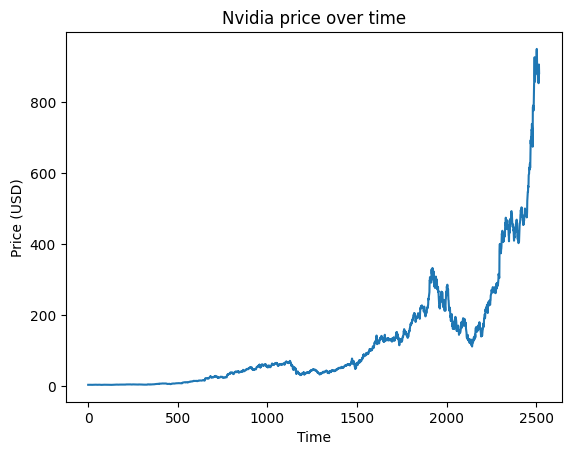

In [ ]:
plt.plot(y)
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.title("Nvidia price over time")
plt.savefig("initial_plot.png", dpi=250)
plt.show();

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))

print("X shape is:", X.shape)
print("y is:", y)
print("X shape after fit transform is:", X_trans.shape)
print("y after fit transform is:", y_trans)

print(X_trans.shape)
print(y_trans.shape)
print(X_trans[-20:][0])

X shape is: (2517, 4)
y is: [  4.34024191   4.37103987   4.38051701 ... 870.39001465 906.15997314
 881.85998535]
X shape after fit transform is: (2517, 4)
y after fit transform is: [[3.45112391e-04]
 [3.77668157e-04]
 [3.87686208e-04]
 ...
 [9.15825076e-01]
 [9.53636621e-01]
 [9.27949700e-01]]
(2517, 4)
(2517, 1)
[4.68086972 4.74559774 4.74371311 0.69200456]


In [ ]:
# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, 100, 10)

print("X_ss is:", X_ss)
print("X_trans is:", X_trans[-15:])
print("""

X all good, y all good

NEW ARRAY

""")
print("y_ss is:", y_mm)
print("y_trans is:", y_trans[100])

print("""

NEW ARRAY

""")

print("X_ss shape is:", X_ss.shape)

print("""

NEW ARRAY

""")

print("y_ss shape is:", y_mm.shape)







X_ss is: [[[-0.73136887 -0.731744   -0.7313445  -0.67639098]
  [-0.73122063 -0.73151101 -0.73128406 -0.61988942]
  [-0.73092415 -0.73149645 -0.73113292 -0.89160669]
  ...
  [-0.72923947 -0.7298706  -0.72926671 -1.05776474]
  [-0.72908988 -0.72950324 -0.72903796 -0.7965252 ]
  [-0.7290151  -0.72891549 -0.72877872  0.11197224]]

 [[-0.73122063 -0.73151101 -0.73128406 -0.61988942]
  [-0.73092415 -0.73149645 -0.73113292 -0.89160669]
  [-0.73110204 -0.73124889 -0.73095157 -1.21064577]
  ...
  [-0.72908988 -0.72950324 -0.72903796 -0.7965252 ]
  [-0.7290151  -0.72891549 -0.72877872  0.11197224]
  [-0.72847661 -0.72898896 -0.72847372 -0.81866918]]

 [[-0.73092415 -0.73149645 -0.73113292 -0.89160669]
  [-0.73110204 -0.73124889 -0.73095157 -1.21064577]
  [-0.73087969 -0.73120521 -0.73084579 -1.35345568]
  ...
  [-0.7290151  -0.72891549 -0.72877872  0.11197224]
  [-0.72847661 -0.72898896 -0.72847372 -0.81866918]
  [-0.72856635 -0.72915059 -0.72867197 -0.56260595]]

 ...

 [[ 1.79939104  1.8461565

In [ ]:
total_samples = len(X)
train_test_cutoff = round(0.90 * total_samples)

X_train = X_ss[:-150]
X_test = X_ss[-150:]

y_train = y_mm[:-150]
y_test = y_mm[-150:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2258, 100, 4)
(150, 100, 4)
(2258, 10)
(150, 10)


In [ ]:
import torch

X_train_tensors = torch.Tensor(X_train)
X_test_tensors = torch.Tensor(X_test)

y_train_tensors = torch.Tensor(y_train)
y_test_tensors = torch.Tensor(y_test)

In [ ]:
# reshaping to rows, timestamps, features
X_train_tensors_final = torch.reshape(X_train_tensors,
                                      (X_train_tensors.shape[0], 100,
                                       X_train_tensors.shape[2]))
X_test_tensors_final = torch.reshape(X_test_tensors,
                                     (X_test_tensors.shape[0], 100,
                                      X_test_tensors.shape[2]))

print(X_train_tensors_final.shape)

print(X_test_tensors_final.shape)





torch.Size([2258, 100, 4])
torch.Size([150, 100, 4])


In [ ]:
import torch.nn as nn

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.3) # lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) # fully connected
        self.fc_2 = nn.Linear(128, num_classes) # fully connected last layer
        self.relu = nn.ReLU()

    def forward(self,x):
        # hidden state
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        # cell state
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out) # relu
        out = self.fc_2(out) # final output
        return out

In [ ]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train, X_test, y_test):
    for epoch in range(n_epochs):
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        #test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)
        if epoch % 10 == 0:
          print("Epoch: %d, train loss: %1.5f, test loss: %1.5f" % (epoch, loss.item(), test_loss.item()))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

n_epochs = 1000 # 1000 epochs
learning_rate = 0.001 # 0.001 lr

input_size = 4 # number of features
hidden_size = 2 # number of features in hidden state
num_layers = 1 # number of stacked lstm layers

num_classes = 10 # number of output classes

train_and_review_lstm = LSTM(num_classes,
              input_size,
              hidden_size,
              num_layers)

In [ ]:
loss_fn = torch.nn.MSELoss()    #mean-squared error for regression
optimiser = torch.optim.Adam(train_and_review_lstm.parameters(), lr=learning_rate)

print(X_train_tensors_final.size())

training_loop(n_epochs=n_epochs,
              lstm=train_and_review_lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_train_tensors_final,
              y_train=y_train_tensors,
              X_test=X_test_tensors_final,
              y_test=y_test_tensors)

torch.Size([2258, 100, 4])
Epoch: 0, train loss: 0.05605, test loss: 0.37636
Epoch: 10, train loss: 0.01470, test loss: 0.30910
Epoch: 20, train loss: 0.01316, test loss: 0.29576
Epoch: 30, train loss: 0.01191, test loss: 0.28740
Epoch: 40, train loss: 0.01081, test loss: 0.30451
Epoch: 50, train loss: 0.01026, test loss: 0.31036
Epoch: 60, train loss: 0.00930, test loss: 0.30103
Epoch: 70, train loss: 0.00817, test loss: 0.29387
Epoch: 80, train loss: 0.00677, test loss: 0.28482
Epoch: 90, train loss: 0.00521, test loss: 0.26572
Epoch: 100, train loss: 0.00377, test loss: 0.24101
Epoch: 110, train loss: 0.00280, test loss: 0.21557
Epoch: 120, train loss: 0.00223, test loss: 0.19280
Epoch: 130, train loss: 0.00186, test loss: 0.17498
Epoch: 140, train loss: 0.00160, test loss: 0.16024
Epoch: 150, train loss: 0.00141, test loss: 0.14692
Epoch: 160, train loss: 0.00126, test loss: 0.13493
Epoch: 170, train loss: 0.00112, test loss: 0.12439
Epoch: 180, train loss: 0.00101, test loss: 0.11

(2517, 4)
(2517, 1)
(2408, 100, 4)
(2408, 10)
torch.Size([2408, 100, 4])
torch.Size([2408, 10])
train predict is: tensor([[0.0073, 0.0071, 0.0071,  ..., 0.0060, 0.0081, 0.0058],
        [0.0054, 0.0046, 0.0048,  ..., 0.0038, 0.0060, 0.0035],
        [0.0060, 0.0054, 0.0056,  ..., 0.0046, 0.0067, 0.0042],
        ...,
        [0.5064, 0.5062, 0.5143,  ..., 0.5079, 0.5186, 0.5160],
        [0.5028, 0.5027, 0.5104,  ..., 0.5047, 0.5149, 0.5124],
        [0.5081, 0.5079, 0.5161,  ..., 0.5094, 0.5204, 0.5177]],
       grad_fn=<AddmmBackward0>)
shape of train predict is: torch.Size([2408, 10])
shape of data predict is: (2408, 10)
shape of dataY plot is: (2408, 10)
shape of data predict is: (2408, 10)
shape of dataY plot is: (2408, 10)
data predict is: [[ 10.921234   10.694166   10.699371  ...   9.714272   11.678044
    9.457666 ]
 [  9.106249    8.390254    8.600407  ...   7.644261    9.714319
    7.3196964]
 [  9.710971    9.157885    9.299823  ...   8.333945   10.368606
    8.032024 ]
 ...

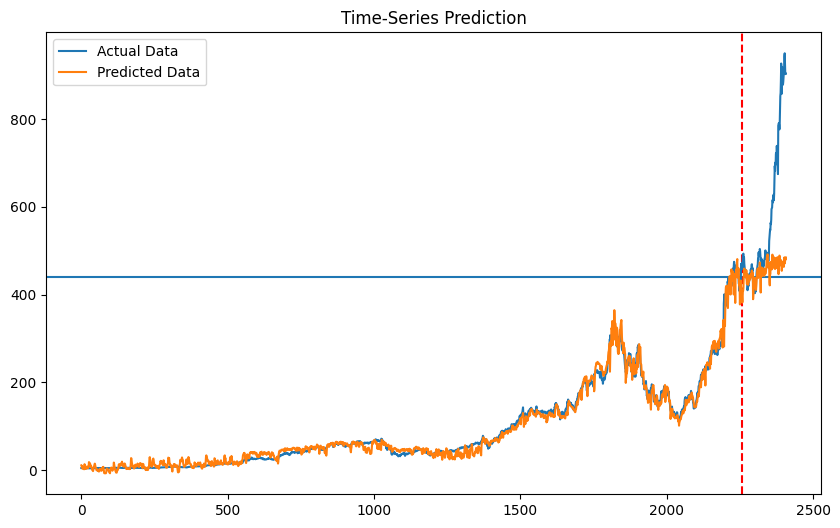

In [ ]:
testing_X_trans = ss.transform(df.drop(columns=['Close'])) # old transformers
testing_y_trans = mm.transform(df.Close.values.reshape(-1, 1)) # old transformers

print(testing_X_trans.shape)
print(testing_y_trans.shape)

# split the sequence
testing_X_trans, testing_y_trans = split_sequences(testing_X_trans, testing_y_trans, 100, 10)

print(testing_X_trans.shape)
print(testing_y_trans.shape)

# converting to tensors
testing_X_trans = torch.Tensor(testing_X_trans)
testing_y_trans = torch.Tensor(testing_y_trans)


# reshaping the dataset
testing_X_trans = torch.reshape(testing_X_trans, (testing_X_trans.shape[0], 100, testing_X_trans.shape[2]))

print(testing_X_trans.shape)
print(testing_y_trans.shape)


train_predict = train_and_review_lstm(testing_X_trans) # forward pass

print("train predict is:", train_predict)
print("shape of train predict is:", train_predict.shape)

data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = testing_y_trans.data.numpy()


print("shape of data predict is:", data_predict.shape)
print("shape of dataY plot is:", dataY_plot.shape)


data_predict = mm.inverse_transform(data_predict) # reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)

print("shape of data predict is:", data_predict.shape)
print("shape of dataY plot is:", dataY_plot.shape)

print("data predict is:", data_predict)
print("dataY plot is:", dataY_plot)

print("len datay plot is:", len(dataY_plot))
true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
#for i in range(1,len(dataY_plot[-1])):
    #true.append(dataY_plot[-1][i])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])
#for i in range(1,len(data_predict[-1])):
    #true.append(data_predict[-1][i])

plt.figure(figsize=(10,6)) #plotting
plt.axhline(y=440)
plt.axvline(x=2258, c='r', linestyle='--') # size of the training set
plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show()

torch.Size([150, 100, 4])
torch.Size([1, 10])


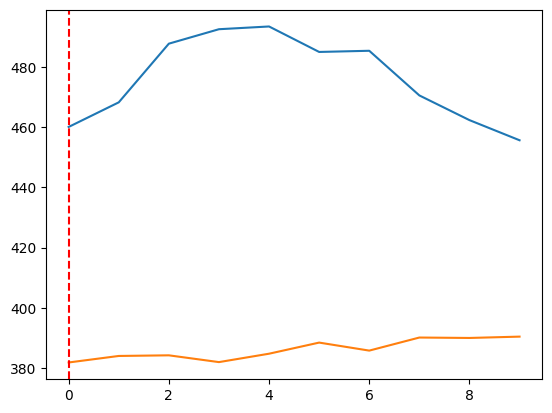

In [ ]:
print(X_test_tensors_final.shape)
test_predict = train_and_review_lstm(X_test_tensors_final[0].unsqueeze(0)) # get the last sample, was X_test_tensors_final[-1].unsqueeze()
print(test_predict.shape)

test_predict = test_predict.detach().numpy()
test_predict = mm.inverse_transform(test_predict)
test_predict = test_predict[0].tolist()

test_target = y_test_tensors[0].detach().numpy() # last sample again
test_target = mm.inverse_transform(test_target.reshape(1, -1))
test_target = test_target[0].tolist()

plt.plot(test_target, label="Actual Data")
plt.plot(test_predict, label="LSTM Predictions")
plt.savefig("small_plot.png", dpi=300)
plt.axvline(x=0, c='r', linestyle='--')
plt.show();

(2408, 10)
train predict is: tensor([[0.0073, 0.0071, 0.0071,  ..., 0.0060, 0.0081, 0.0058],
        [0.0054, 0.0046, 0.0048,  ..., 0.0038, 0.0060, 0.0035],
        [0.0060, 0.0054, 0.0056,  ..., 0.0046, 0.0067, 0.0042],
        ...,
        [0.5064, 0.5062, 0.5143,  ..., 0.5079, 0.5186, 0.5160],
        [0.5028, 0.5027, 0.5104,  ..., 0.5047, 0.5149, 0.5124],
        [0.5081, 0.5079, 0.5161,  ..., 0.5094, 0.5204, 0.5177]],
       grad_fn=<AddmmBackward0>)
(2408, 10)
(2408, 10)
data predict is; [[ 10.921234   10.694166   10.699371  ...   9.714272   11.678044
    9.457666 ]
 [  9.106249    8.390254    8.600407  ...   7.644261    9.714319
    7.3196964]
 [  9.710971    9.157885    9.299823  ...   8.333945   10.368606
    8.032024 ]
 ...
 [483.0906    482.92307   490.528     ... 484.4999    494.63678
  492.15268  ]
 [479.70718   479.61758   486.83765   ... 481.4645    491.0881
  488.78156  ]
 [484.6646    484.4609    492.2451    ... 485.91217   496.28775
  493.7209   ]]
datay is: [[  4.773

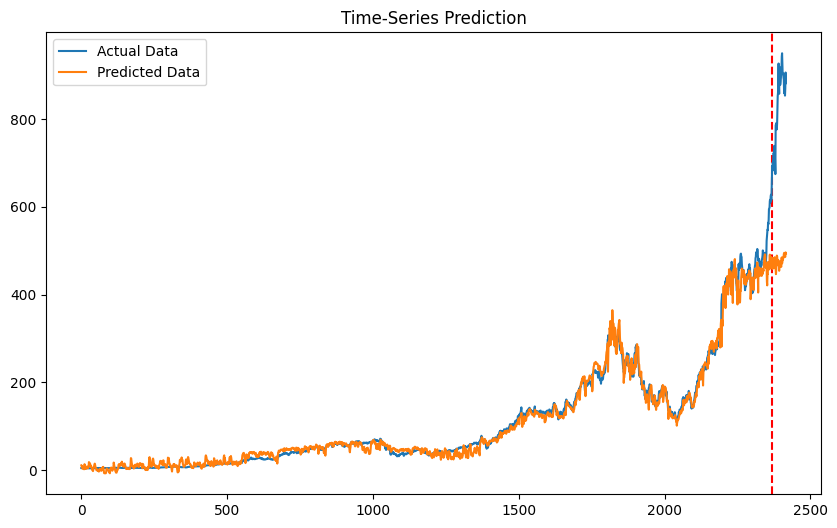

In [ ]:
#ACTUAL PREDICTION
# split the sequence
#willywanker is j because im not gonna use it
actual_test_X_ss, df_y_mm = split_sequences(X_trans, y_trans, 100, 10)

print(df_y_mm.shape)


# converting to tensors
actual_test_X_ss = torch.Tensor(actual_test_X_ss)
df_y_mm = torch.Tensor(df_y_mm)


# reshaping the dataset
df_X_ss = torch.reshape(actual_test_X_ss, (actual_test_X_ss.shape[0], 100, actual_test_X_ss.shape[2]))



train_predict = train_and_review_lstm(actual_test_X_ss) # forward pass

print("train predict is:", train_predict)

data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = df_y_mm.data.numpy()

print(data_predict.shape)
print(dataY_plot.shape)

data_predict = mm.inverse_transform(data_predict) # reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)

print("data predict is;", data_predict)
print("datay is:", dataY_plot)
true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(1,len(dataY_plot[-1])):
    true.append(dataY_plot[-1][i])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])
for i in range(1,len(data_predict[-1])):
    preds.append(data_predict[-1][i])
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=2367, c='r', linestyle='--') # size of the training set

plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show()


train predict is: tensor([[8.2815e-04, 1.0523e-03, 1.0606e-03,  ..., 1.0618e-03, 1.6753e-03,
         1.3455e-03],
        [1.8672e-03, 1.7813e-03, 1.9208e-03,  ..., 2.0345e-03, 2.6640e-03,
         2.1781e-03],
        [1.5884e-03, 1.6128e-03, 1.6889e-03,  ..., 1.7815e-03, 2.4500e-03,
         1.9887e-03],
        ...,
        [8.8894e-01, 8.9447e-01, 9.0015e-01,  ..., 9.2294e-01, 9.2858e-01,
         9.3313e-01],
        [9.0880e-01, 9.1473e-01, 9.2122e-01,  ..., 9.4375e-01, 9.5029e-01,
         9.5469e-01],
        [9.2172e-01, 9.2792e-01, 9.3495e-01,  ..., 9.5743e-01, 9.6455e-01,
         9.6896e-01]], grad_fn=<AddmmBackward0>)
(2418, 10)
(2408, 10)
data predict is; [[  4.797196    5.0092015   5.017055  ...   5.018252    5.5985694
    5.2866187]
 [  5.7801228   5.698884    5.830844  ...   5.9384437   6.533938
    6.0742555]
 [  5.516397    5.5395083   5.611475  ...   5.6991196   6.3315144
    5.8950596]
 ...
 [844.9554    850.1854    855.56323   ... 877.1201    882.45233
  886.7586

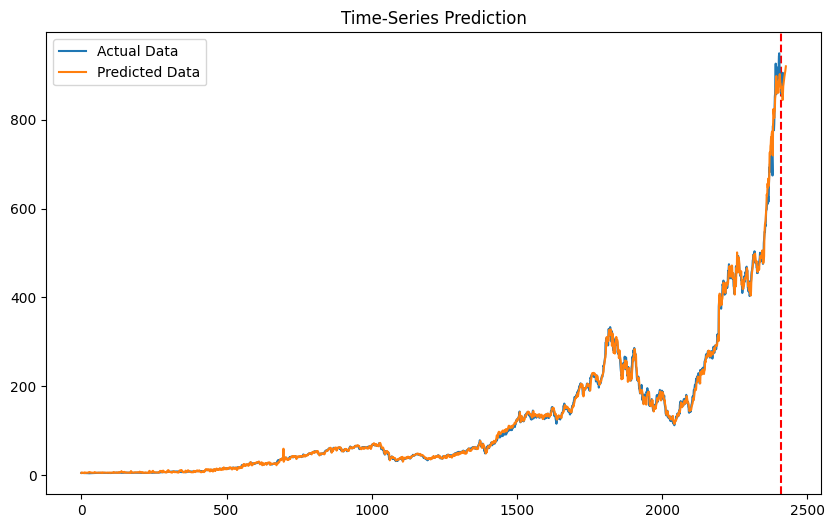

*Predicted prices for the next ten days*
[875.9626  881.8359  888.4806  894.1683  897.4063  901.22925 905.91583
 909.74634 916.48206 920.6561 ]
*Predicted prices for the next ten days*


In [ ]:

X_actual_test_tensors, willywanker = split_sequences(X_trans, y_trans, 100, 10)

X_actual_test_tensors = torch.Tensor(X_actual_test_tensors)
willywanker = torch.Tensor(willywanker)

n_epochs = 300
"""
training_loop(n_epochs=n_epochs,
              lstm=train_and_review_lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_actual_test_tensors,
              y_train=willywanker,
              X_test=X_test_tensors_final,
              y_test=y_test_tensors)
              """

X_actual_prediction, empty = split_sequences(X_trans, y_trans, 100, 0)

X_actual_prediction = torch.Tensor(X_actual_prediction)


X_actual_prediction = torch.reshape(X_actual_prediction, (X_actual_prediction.shape[0], 100, X_actual_prediction.shape[2]))

actual_predict = train_and_review_lstm(X_actual_prediction) # forward pass

print("train predict is:", actual_predict)

data_predict = actual_predict.data.numpy() # numpy conversion
dataY_plot = df_y_mm.data.numpy()

print(data_predict.shape)
print(dataY_plot.shape)

data_predict = mm.inverse_transform(data_predict) # reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)

print("data predict is;", data_predict)
print("datay is:", dataY_plot)
true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(1,len(dataY_plot[-1])):
    true.append(dataY_plot[-1][i])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])
for i in range(1,len(data_predict[-1])):
    preds.append(data_predict[-1][i])
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=2408, c='r', linestyle='--') # size of the training set

plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show()

print("*Predicted prices for the next ten days*")
print(data_predict[-1])
print("*Predicted prices for the next ten days*")
